In [1]:
import datetime as dt
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
from pandas_datareader import data
start = '2014-06-20'
end = dt.date.today()
df = data.DataReader('7203.JP', 'stooq', start = start, end = end)
df

,Open,High,Low,Close,Volume
Date,,,,,
2024-06-19,3076.00,3113.00,3069.00,3107.00,17496200
2024-06-18,3068.00,3086.00,3041.00,3052.00,19056000
2024-06-17,3056.00,3063.00,3010.00,3036.00,28829800
2024-06-14,3058.00,3132.00,3055.00,3116.00,40221400
2024-06-13,3226.00,3227.00,3127.00,3128.00,26927900
...,...,...,...,...,...
2014-06-26,1066.75,1074.43,1065.86,1072.82,42587485
2014-06-25,1060.32,1070.32,1060.32,1064.07,30472175
2014-06-24,1061.93,1067.82,1056.75,1064.79,33379935


In [4]:
close = df.drop(['Open', 'High', 'Low', 'Volume'], axis=1)#終値のみにする
close = close.sort_values('Date')#日付を昇順に

close

,Close
Date,
2014-06-20,1077.11
2014-06-23,1068.36
2014-06-24,1064.79
2014-06-25,1064.07
2014-06-26,1072.82
...,...
2024-06-13,3128.00
2024-06-14,3116.00
2024-06-17,3036.00


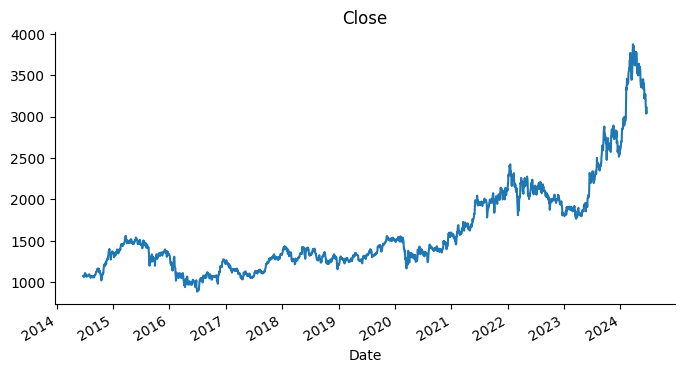

In [5]:
# @title Close

from matplotlib import pyplot as plt
close['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp1zbro27d/duu18ed0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1zbro27d/5tgbqixx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19873', 'data', 'file=/tmp/tmp1zbro27d/duu18ed0.json', 'init=/tmp/tmp1zbro27d/5tgbqixx.json', 'output', 'file=/tmp/tmp1zbro27d/prophet_modelz1jnmtyy/prophet_model-20240620062658.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:26:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:26:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


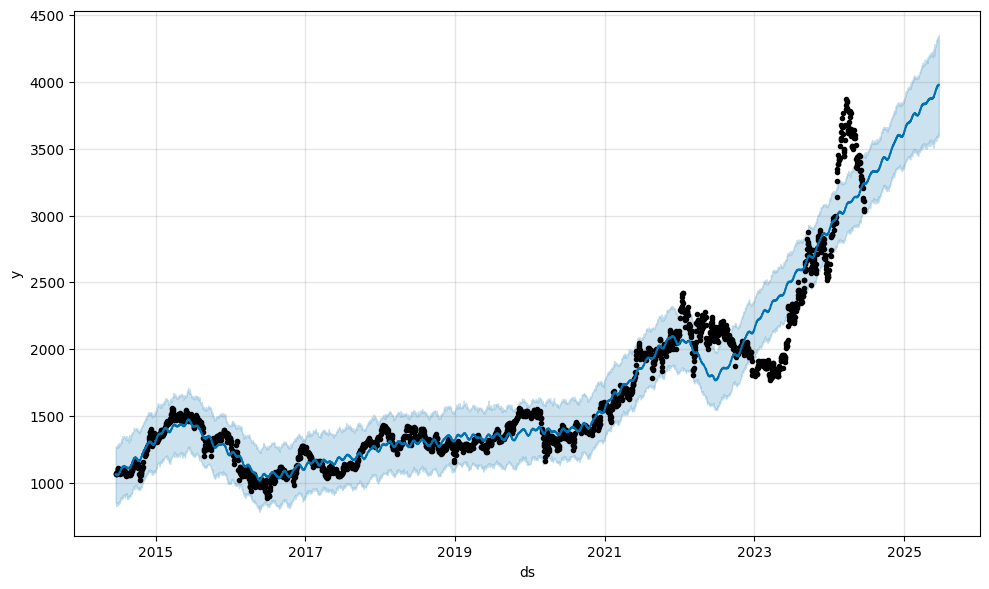

In [6]:
hist = pd.DataFrame(columns = ['ds', 'y'])
hist['y'] = close['Close'].copy()
hist['ds'] = close.index.copy()
hist['ds'] = hist['ds'].dt.tz_localize(None)

hist

# モデル作成
model = Prophet(
    # 各周期のトレンドを考慮するか
    daily_seasonality=True,
    weekly_seasonality=True,
    yearly_seasonality=True
)
model.fit(hist)
future_df = model.make_future_dataframe(365)
forecast_df = model.predict(future_df)
model.plot(forecast_df)
plt.show()